In [144]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
customer_churn = pd.read_csv("Churn_Modelling.csv")

In [146]:
customer_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [147]:
customer_churn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [148]:
customer_churn.shape

(10000, 14)

In [149]:
customer_churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [150]:
customer_churn['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [151]:
customer_churn.drop(['RowNumber','Surname','Geography'],axis=1, inplace= True)

In [152]:
customer_churn.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [153]:
label=LabelEncoder()
labels=label.fit_transform(customer_churn.Gender)
customer_churn['Gender']=labels

In [154]:
customer_churn.Gender

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int32

In [155]:
customer_churn.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0


In [156]:
x = customer_churn.drop(columns='Exited', axis=1)

In [157]:
y=customer_churn['Exited']

In [158]:
print (x)

      CustomerId  CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  \
0       15634602          619       0   42       2       0.00              1   
1       15647311          608       0   41       1   83807.86              1   
2       15619304          502       0   42       8  159660.80              3   
3       15701354          699       0   39       1       0.00              2   
4       15737888          850       0   43       2  125510.82              1   
...          ...          ...     ...  ...     ...        ...            ...   
9995    15606229          771       1   39       5       0.00              2   
9996    15569892          516       1   35      10   57369.61              1   
9997    15584532          709       0   36       7       0.00              1   
9998    15682355          772       1   42       3   75075.31              2   
9999    15628319          792       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  Estima

In [159]:
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


<Axes: >

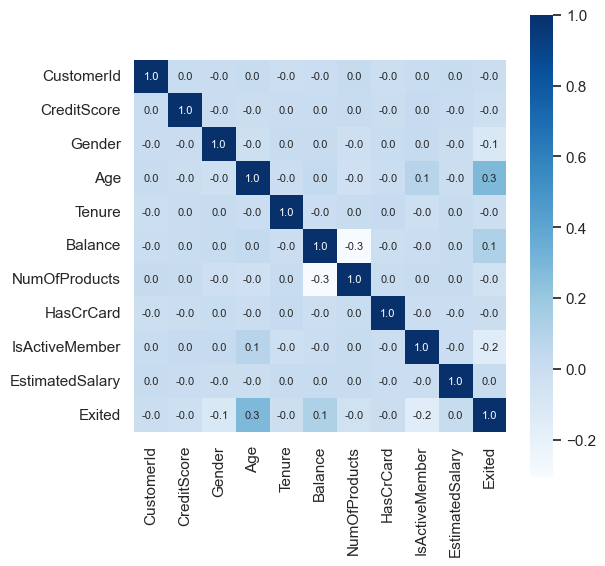

In [169]:
correlation = customer_churn.corr()
plt.figure(figsize=(6,6))
sns.heatmap(correlation , cbar=True , square=True, fmt='.1f', annot=True,annot_kws={'size':8},cmap='Blues')

<Axes: xlabel='Exited', ylabel='count'>

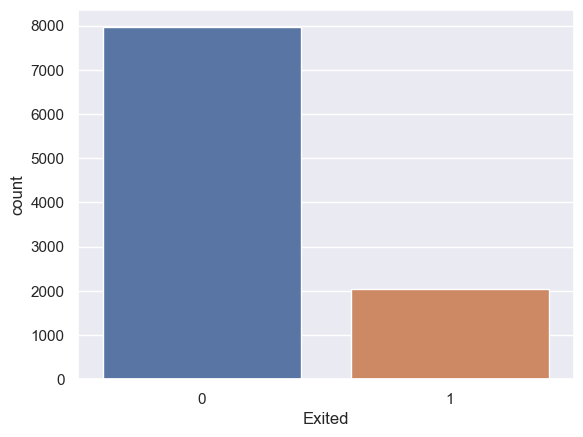

In [160]:
sns.countplot(x='Exited',data=customer_churn)

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2 ,random_state=3 )

In [94]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

In [95]:
x_train

array([[-1.60807066,  0.0862834 , -1.09499335, ..., -1.53942844,
         0.97238125,  0.94284216],
       [-0.97247162,  0.31430986,  0.91324755, ..., -1.53942844,
        -1.02840321, -0.8892186 ],
       [ 1.44088884, -1.82084701, -1.09499335, ...,  0.64959174,
        -1.02840321, -1.24375504],
       ...,
       [-1.05143521,  0.28321534,  0.91324755, ...,  0.64959174,
         0.97238125,  1.47215448],
       [ 1.5864479 , -0.51487727, -1.09499335, ..., -1.53942844,
         0.97238125,  1.06350441],
       [ 0.77010966, -0.7325389 ,  0.91324755, ...,  0.64959174,
         0.97238125, -1.2962918 ]])

In [96]:
x_test = sc.fit_transform(x_test)
x_test

array([[-1.45602999,  0.555478  ,  0.90911166, ...,  0.63212351,
        -1.03979106,  1.68796811],
       [-1.50925259, -0.09189034,  0.90911166, ...,  0.63212351,
        -1.03979106, -0.1693388 ],
       [-1.45619485, -0.9755995 , -1.09997489, ...,  0.63212351,
        -1.03979106,  1.30781066],
       ...,
       [-1.01421647,  1.89131742,  0.90911166, ..., -1.58196933,
        -1.03979106, -1.00965029],
       [-0.5938486 ,  0.08279636, -1.09997489, ...,  0.63212351,
        -1.03979106,  1.11502867],
       [ 0.23839679,  0.25748305, -1.09997489, ...,  0.63212351,
        -1.03979106, -1.20166062]])

In [97]:
model = LogisticRegression()

In [98]:
model.fit(x_train,y_train)

LogisticRegression()

In [99]:
x1=model.predict(x_test)

In [100]:
accuracy_score(y_test,x1)

0.814

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
RF = RandomForestClassifier()

In [103]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [104]:
x2 = RF.predict(x_test)

In [105]:
accuracy_score(y_test,x2)

0.855

In [106]:
from sklearn import svm

In [107]:
svm=svm.SVC()
svm.fit(x_train,y_train)



SVC()

In [108]:
x3 = svm.predict(x_test)
accuracy_score(y_test,x3)

0.861

In [167]:
print("accuracy score using LogisticRegression :",accuracy_score(y_test,x1))
print("accuracy score using RandomForestClassifier:",accuracy_score(y_test,x2))
print("accuracy score using SVM :",accuracy_score(y_test,x3))


accuracy score using LogisticRegression : 0.814
accuracy score using RandomForestClassifier: 0.855
accuracy score using SVM : 0.861
